## Binance Data Preparation

In [1]:
import requests
import pandas as pd
from datetime import datetime
import configparser
from binance import Client, ThreadedWebsocketManager, ThreadedDepthCacheManager
import pandas as pd
import numpy as np

Use the API keys assigned by Binance to access the API 

In [2]:
config_data=configparser.ConfigParser()
config_data.read("config.ini")
keys=config_data['keys']
client=Client(keys['apiKey'],keys['secretKey']) #create binance api client
print('logged in')

logged in


The following code uses the Binance API to fetch all ticker prices for all symbols.
Ticker definition: In finance and investing, a ticker symbol (often simply called a "ticker") is a unique series of letters assigned to a publicly traded company, mutual fund, or other financial asset that trades on a stock exchange.

In [3]:
tickers=client.get_all_tickers()
tickers

[{'symbol': 'ETHBTC', 'price': '0.06520200'},
 {'symbol': 'LTCBTC', 'price': '0.00305700'},
 {'symbol': 'BNBBTC', 'price': '0.01139500'},
 {'symbol': 'NEOBTC', 'price': '0.00037400'},
 {'symbol': 'QTUMETH', 'price': '0.00151500'},
 {'symbol': 'EOSETH', 'price': '0.00053800'},
 {'symbol': 'SNTETH', 'price': '0.00001405'},
 {'symbol': 'BNTETH', 'price': '0.00025560'},
 {'symbol': 'BCCBTC', 'price': '0.07908100'},
 {'symbol': 'GASBTC', 'price': '0.00010750'},
 {'symbol': 'BNBETH', 'price': '0.17470000'},
 {'symbol': 'BTCUSDT', 'price': '29101.70000000'},
 {'symbol': 'ETHUSDT', 'price': '1897.27000000'},
 {'symbol': 'HSRBTC', 'price': '0.00041400'},
 {'symbol': 'OAXETH', 'price': '0.00017780'},
 {'symbol': 'DNTETH', 'price': '0.00002801'},
 {'symbol': 'MCOETH', 'price': '0.00577200'},
 {'symbol': 'ICNETH', 'price': '0.00166300'},
 {'symbol': 'MCOBTC', 'price': '0.00021140'},
 {'symbol': 'WTCBTC', 'price': '0.00000692'},
 {'symbol': 'WTCETH', 'price': '0.00023700'},
 {'symbol': 'LRCBTC', 'p

In [4]:
ticker_df=pd.DataFrame(tickers)
ticker_df

,symbol,price
0,ETHBTC,0.06520200
1,LTCBTC,0.00305700
2,BNBBTC,0.01139500
3,NEOBTC,0.00037400
4,QTUMETH,0.00151500
...,...,...
2191,USDTPLN,4.17100000
2192,ACHTRY,0.67990000
2193,XVSTRY,126.30000000
2194,EGLDRON,200.30000000


In [5]:
ticker_df.set_index('symbol',inplace=True)

In [6]:
ticker_df

,price
symbol,
ETHBTC,0.06520200
LTCBTC,0.00305700
BNBBTC,0.01139500
NEOBTC,0.00037400
QTUMETH,0.00151500
...,...
USDTPLN,4.17100000
ACHTRY,0.67990000
XVSTRY,126.30000000


only for insights 

In [7]:
depth=client.get_order_book(symbol='ETHBTC')
depth
depth_df=pd.DataFrame(depth['asks'])
depth_df.columns=['Price','Volume']
depth_df.head()

,Price,Volume
0,0.06520200,35.37560000
1,0.06520300,8.88950000
2,0.06520400,6.02520000
3,0.06520500,1.40760000
4,0.06520600,2.40910000


In [8]:
#  [
#   [
#     1499040000000,      // Open time
#     "0.01634790",       // Open
#     "0.80000000",       // High
#     "0.01575800",       // Low
#     "0.01577100",       // Close
#     "148976.11427815",  // Volume
#     1499644799999,      // Close time
#     "2434.19055334",    // Quote asset volume
#     308,                // Number of trades
#     "1756.87402397",    // Taker buy base asset volume
#     "28.46694368",      // Taker buy quote asset volume
#     "17928899.62484339" // Ignore.
#   ]
# ]
#client.get_historical_klines??

In financial charting, a candlestick is a visual representation of the price movement of an asset over a specific time period. Each candlestick represents a single unit of time (e.g. a minute, an hour, a day) and displays the asset's opening price, closing price, highest price (high), and lowest price (low) during that time period. 

Binance was launched in July 2017 and therefore the historical data for trading pairs listed on Binance is available from the time the exchange began operations.

In [139]:
historical = client.get_historical_klines('BTCUSDT',Client.KLINE_INTERVAL_1DAY,'27 Feb 2021')# parameters:(symbol, interval, date_from)
historical

[[1614384000000,
  '46276.88000000',
  '48394.00000000',
  '45000.00000000',
  '46106.43000000',
  '66060.83429200',
  1614470399999,
  '3105897438.55097179',
  1757720,
  '31987.01964700',
  '1505012110.94959802',
  '0'],
 [1614470400000,
  '46103.67000000',
  '46638.46000000',
  '43000.00000000',
  '45135.66000000',
  '83055.36904200',
  1614556799999,
  '3708359965.45458128',
  1838345,
  '40688.17185000',
  '1817797446.60238093',
  '0'],
 [1614556800000,
  '45134.11000000',
  '49790.00000000',
  '44950.53000000',
  '49587.03000000',
  '85086.11164800',
  1614643199999,
  '4057515794.86572823',
  2147223,
  '42616.99436100',
  '2032566685.61430702',
  '0'],
 [1614643200000,
  '49595.76000000',
  '50200.00000000',
  '47047.60000000',
  '48440.65000000',
  '64221.06214000',
  1614729599999,
  '3120472069.90945280',
  1855583,
  '31377.03807700',
  '1525145370.14352052',
  '0'],
 [1614729600000,
  '48436.61000000',
  '52640.00000000',
  '48100.71000000',
  '50349.37000000',
  '81035.91

btcusdt is the price of bitcion relative to the US dollar; 1 usdt ~ 1 dollar; usdt was chosen because its price is tied to the dollar and does not fluctuate like other cryptocurrencies

In [140]:
hist_df=pd.DataFrame(historical)
hist_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,1614384000000,46276.88000000,48394.00000000,45000.00000000,46106.43000000,66060.83429200,1614470399999,3105897438.55097179,1757720,31987.01964700,1505012110.94959802,0
1,1614470400000,46103.67000000,46638.46000000,43000.00000000,45135.66000000,83055.36904200,1614556799999,3708359965.45458128,1838345,40688.17185000,1817797446.60238093,0
2,1614556800000,45134.11000000,49790.00000000,44950.53000000,49587.03000000,85086.11164800,1614643199999,4057515794.86572823,2147223,42616.99436100,2032566685.61430702,0
3,1614643200000,49595.76000000,50200.00000000,47047.60000000,48440.65000000,64221.06214000,1614729599999,3120472069.90945280,1855583,31377.03807700,1525145370.14352052,0
4,1614729600000,48436.61000000,52640.00000000,48100.71000000,50349.37000000,81035.91370500,1614815999999,4109521257.54070026,2242131,40955.36839900,2077586898.67821050,0


In [141]:
hist_df.columns=['date','Open','High','Low','Close','Volume','Close Time','Quote Asset Volume','Number of Trades','TB Base Volume','TB Quote Volume','Ignore']
hist_df.head()

,date,Open,High,Low,Close,Volume,Close Time,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume,Ignore
0,1614384000000,46276.88000000,48394.00000000,45000.00000000,46106.43000000,66060.83429200,1614470399999,3105897438.55097179,1757720,31987.01964700,1505012110.94959802,0
1,1614470400000,46103.67000000,46638.46000000,43000.00000000,45135.66000000,83055.36904200,1614556799999,3708359965.45458128,1838345,40688.17185000,1817797446.60238093,0
2,1614556800000,45134.11000000,49790.00000000,44950.53000000,49587.03000000,85086.11164800,1614643199999,4057515794.86572823,2147223,42616.99436100,2032566685.61430702,0
3,1614643200000,49595.76000000,50200.00000000,47047.60000000,48440.65000000,64221.06214000,1614729599999,3120472069.90945280,1855583,31377.03807700,1525145370.14352052,0
4,1614729600000,48436.61000000,52640.00000000,48100.71000000,50349.37000000,81035.91370500,1614815999999,4109521257.54070026,2242131,40955.36839900,2077586898.67821050,0


In [142]:
hist_df.shape

(790, 12)

In [143]:
hist_df.dtypes #int64 + objects (which are strings) >> preprocessing

date                   int64
Open                  object
High                  object
Low                   object
Close                 object
Volume                object
Close Time             int64
Quote Asset Volume    object
Number of Trades       int64
TB Base Volume        object
TB Quote Volume       object
Ignore                object
dtype: object

In [144]:
hist_df.head()
type(hist_df.date[0])

numpy.int64

In [145]:
#convert from Unix timestamps to date
hist_df['date']= pd.to_datetime(hist_df['date']/1000, unit='s')
hist_df['Close Time']= pd.to_datetime(hist_df['Close Time']/1000, unit='s')
hist_df.dtypes

date                  datetime64[ns]
Open                          object
High                          object
Low                           object
Close                         object
Volume                        object
Close Time            datetime64[ns]
Quote Asset Volume            object
Number of Trades               int64
TB Base Volume                object
TB Quote Volume               object
Ignore                        object
dtype: object

In [146]:
hist_df.head() #notice open time and close time 

,date,Open,High,Low,Close,Volume,Close Time,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume,Ignore
0,2021-02-27,46276.88000000,48394.00000000,45000.00000000,46106.43000000,66060.83429200,2021-02-27 23:59:59.999000064,3105897438.55097179,1757720,31987.01964700,1505012110.94959802,0
1,2021-02-28,46103.67000000,46638.46000000,43000.00000000,45135.66000000,83055.36904200,2021-02-28 23:59:59.999000064,3708359965.45458128,1838345,40688.17185000,1817797446.60238093,0
2,2021-03-01,45134.11000000,49790.00000000,44950.53000000,49587.03000000,85086.11164800,2021-03-01 23:59:59.999000064,4057515794.86572823,2147223,42616.99436100,2032566685.61430702,0
3,2021-03-02,49595.76000000,50200.00000000,47047.60000000,48440.65000000,64221.06214000,2021-03-02 23:59:59.999000064,3120472069.90945280,1855583,31377.03807700,1525145370.14352052,0
4,2021-03-03,48436.61000000,52640.00000000,48100.71000000,50349.37000000,81035.91370500,2021-03-03 23:59:59.999000064,4109521257.54070026,2242131,40955.36839900,2077586898.67821050,0


In [147]:
#date_series = ts_series.apply(lambda x: x.date())
hist_df.date=hist_df.date.apply(lambda x: x.date())

Ensure the entries are numeric, not strings

In [148]:
numeric_columns=['Open','High','Low','Close','Volume','Quote Asset Volume','TB Base Volume','TB Quote Volume']
hist_df[numeric_columns]=hist_df[numeric_columns].apply(pd.to_numeric,axis=1)
hist_df.head()

,date,Open,High,Low,Close,Volume,Close Time,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume,Ignore
0,2021-02-27,46276.88,48394.00,45000.00,46106.43,66060.834292,2021-02-27 23:59:59.999000064,3.105897e+09,1757720,31987.019647,1.505012e+09,0
1,2021-02-28,46103.67,46638.46,43000.00,45135.66,83055.369042,2021-02-28 23:59:59.999000064,3.708360e+09,1838345,40688.171850,1.817797e+09,0
2,2021-03-01,45134.11,49790.00,44950.53,49587.03,85086.111648,2021-03-01 23:59:59.999000064,4.057516e+09,2147223,42616.994361,2.032567e+09,0
3,2021-03-02,49595.76,50200.00,47047.60,48440.65,64221.062140,2021-03-02 23:59:59.999000064,3.120472e+09,1855583,31377.038077,1.525145e+09,0
4,2021-03-03,48436.61,52640.00,48100.71,50349.37,81035.913705,2021-03-03 23:59:59.999000064,4.109521e+09,2242131,40955.368399,2.077587e+09,0


In [149]:
hist_df.dtypes

date                          object
Open                         float64
High                         float64
Low                          float64
Close                        float64
Volume                       float64
Close Time            datetime64[ns]
Quote Asset Volume           float64
Number of Trades               int64
TB Base Volume               float64
TB Quote Volume              float64
Ignore                        object
dtype: object

In [150]:
hist_df.describe()

,Open,High,Low,Close,Volume,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume
count,790.000000,790.000000,790.000000,790.000000,790.000000,7.900000e+02,7.900000e+02,790.000000,7.900000e+02
mean,35644.481038,36554.090595,34607.121759,35623.136177,127578.169427,3.501188e+09,3.070182e+06,63330.540338,1.734780e+09
std,14056.369651,14444.671721,13585.313149,14053.274072,120077.838701,2.360976e+09,2.654985e+06,59981.164339,1.177454e+09
min,15781.290000,16315.000000,15476.000000,15781.290000,15805.447180,5.453245e+08,4.234460e+05,7642.382430,2.723667e+08
25%,22151.955000,22663.067500,21471.442500,22151.797500,46753.308309,1.921327e+09,1.212296e+06,23064.048390,9.495920e+08
50%,35499.895000,36493.500000,33814.445000,35478.055000,73569.085886,2.802856e+09,1.822004e+06,36329.688970,1.376026e+09
75%,46746.155000,47896.500000,45500.000000,46746.152500,178975.495755,4.280694e+09,4.545711e+06,88293.268005,2.112224e+09
max,67525.820000,69000.000000,66222.400000,67525.830000,760705.362783,1.746531e+10,1.522359e+07,374775.574085,8.783916e+09


In [151]:
hist_df.describe(include='object')

,date,Ignore
count,790,790
unique,790,1
top,2021-02-27,0
freq,1,790


In [152]:
hist_df.describe(include='datetime')

,Close Time
count,790
unique,790
top,2021-02-27 23:59:59.999000064
freq,1
first,2021-02-27 23:59:59.999000064
last,2023-04-27 23:59:59.999000064


In [153]:
hist_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 790 entries, 0 to 789
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date                790 non-null    object        
 1   Open                790 non-null    float64       
 2   High                790 non-null    float64       
 3   Low                 790 non-null    float64       
 4   Close               790 non-null    float64       
 5   Volume              790 non-null    float64       
 6   Close Time          790 non-null    datetime64[ns]
 7   Quote Asset Volume  790 non-null    float64       
 8   Number of Trades    790 non-null    int64         
 9   TB Base Volume      790 non-null    float64       
 10  TB Quote Volume     790 non-null    float64       
 11  Ignore              790 non-null    object        
dtypes: datetime64[ns](1), float64(8), int64(1), object(2)
memory usage: 74.2+ KB


In [155]:
hist_df.head()

,date,Open,High,Low,Close,Volume,Close Time,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume,Ignore
0,2021-02-27,46276.88,48394.00,45000.00,46106.43,66060.834292,2021-02-27 23:59:59.999000064,3.105897e+09,1757720,31987.019647,1.505012e+09,0
1,2021-02-28,46103.67,46638.46,43000.00,45135.66,83055.369042,2021-02-28 23:59:59.999000064,3.708360e+09,1838345,40688.171850,1.817797e+09,0
2,2021-03-01,45134.11,49790.00,44950.53,49587.03,85086.111648,2021-03-01 23:59:59.999000064,4.057516e+09,2147223,42616.994361,2.032567e+09,0
3,2021-03-02,49595.76,50200.00,47047.60,48440.65,64221.062140,2021-03-02 23:59:59.999000064,3.120472e+09,1855583,31377.038077,1.525145e+09,0
4,2021-03-03,48436.61,52640.00,48100.71,50349.37,81035.913705,2021-03-03 23:59:59.999000064,4.109521e+09,2242131,40955.368399,2.077587e+09,0


In [156]:
import seaborn as sns
import matplotlib.pyplot as plt

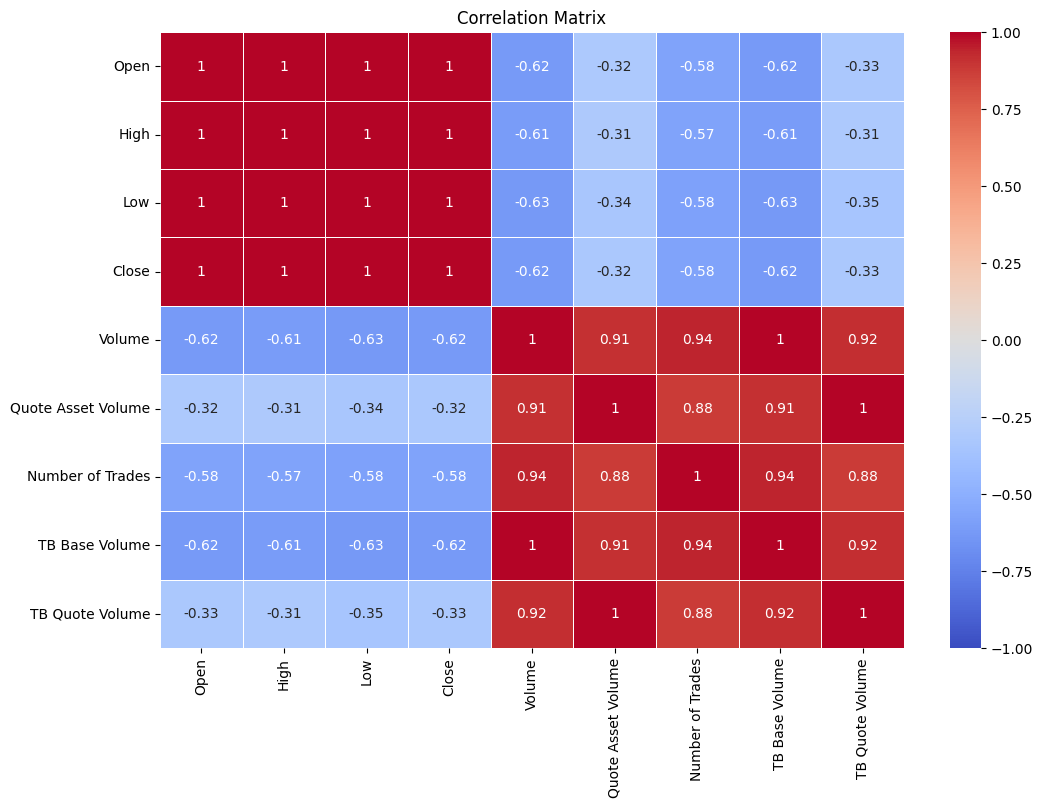

In [158]:
correlations = hist_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlations, annot=True, cmap="coolwarm", vmin=-1, vmax=1, linewidths=.5)
plt.title("Correlation Matrix")
plt.show()

In [159]:
data_csv=hist_df.drop(['Quote Asset Volume','TB Quote Volume','Number of Trades','TB Base Volume','Close Time','Ignore'],axis=1)
data_csv.to_csv('btc_prediction_data.csv')
data_csv

,date,Open,High,Low,Close,Volume
0,2021-02-27,46276.88,48394.00,45000.00,46106.43,66060.834292
1,2021-02-28,46103.67,46638.46,43000.00,45135.66,83055.369042
2,2021-03-01,45134.11,49790.00,44950.53,49587.03,85086.111648
3,2021-03-02,49595.76,50200.00,47047.60,48440.65,64221.062140
4,2021-03-03,48436.61,52640.00,48100.71,50349.37,81035.913705
...,...,...,...,...,...,...
785,2023-04-23,27816.85,27816.85,27311.25,27590.60,34812.095810
786,2023-04-24,27590.59,28000.00,26942.82,27510.93,53111.568740
787,2023-04-25,27510.93,28399.99,27192.00,28300.79,52325.146370
788,2023-04-26,28300.80,30036.00,27235.00,28415.29,129228.404030


## Blockchain Data Preparation from Blockchain.com

In [160]:
#THIS WAS FOR TRIAL ONLYYYY!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
#url = 'https://api.blockchain.info/charts/hash-rate'
#params = {
#    'timespan': '90days',
#    'format': 'json'
#}

# Make the API request
#response = requests.get(url, params=params)

# Extract the data from the response
#data = response.json()['values']

# Print the data
#for entry in data:
#    print('Date:', entry['x'], 'Price:', entry['y'])

In [161]:

features = [
    "hash-rate",
    "avg-block-size",
    "blockchain-size",
    "blocks-size",
    "cost-per-transaction",
    "cost-per-transaction-percent",
    "difficulty",
    "estimated-transaction-volume",
    "estimated-transaction-volume-usd",
    "hash-rate",
    "n-transactions-total",
    "market-price",
    "n-unique-addresses",
    "n-transactions-per-block",
    "n-transactions",
    "miners-revenue",
    "transaction-fees",
    "transaction-fees-usd",
    "n-transactions-excluding-popular",
    "n-transactions-excluding-chains-longer-than-100",
    "output-volume",
    "total-bitcoins",
    "trade-volume"
]

In [164]:
###this is the one that works 
import warnings

# Ignore FutureWarning messages
warnings.filterwarnings("ignore", category=FutureWarning)
url = 'https://api.blockchain.info/charts'
params = {
    'timespan': '2years',
    'format': 'json'
}

# Define the data to retrieve
data_types = ['hash-rate', 'market-price', 'difficulty' , 'avg-block-size','total-bitcoins','cost-per-transaction',
              'blocks-size', 'miners-revenue','transaction-fees','n-transactions-per-block','n-transactions',
              'cost-per-transaction-percent',"estimated-transaction-volume-usd","market-cap"]
#data_types=features

# Initialize a dictionary to store the dataframes
dfs = {}

# Loop over the data types and retrieve the data
for data_type in data_types:
    # Set the API endpoint for the current data type
    current_url = f"{url}/{data_type}"
    
    # Make the API request
    response = requests.get(current_url, params=params)
    
    # Extract the data from the response
    data = response.json()['values']
    
    # Create an empty dataframe for the current data type
    df = pd.DataFrame(columns=['date', data_type])
    
    # Process the data
    for entry in data:
        # Convert the timestamp to a datetime object
        date = datetime.fromtimestamp(entry['x']).date()
        
        # Add a new row to the DataFrame
        df = df.append({'date': date, data_type: entry['y']}, ignore_index=True)
    
    # Store the DataFrame in the dictionary
    dfs[data_type] = df

# Print the DataFrames
for data_type, df in dfs.items():
    print(f"{data_type}:")
    print(df)
    print("\n")



hash-rate:
           date     hash-rate
0    2021-04-27  1.664619e+08
1    2021-04-28  1.664619e+08
2    2021-04-29  1.430165e+08
3    2021-04-30  1.699787e+08
4    2021-05-01  1.589546e+08
..          ...           ...
725  2023-04-22  3.608045e+08
726  2023-04-23  3.559615e+08
727  2023-04-24  3.414325e+08
728  2023-04-25  3.026884e+08
729  2023-04-26  3.147959e+08

[730 rows x 2 columns]


market-price:
           date  market-price
0    2021-04-27      54056.64
1    2021-04-28      55071.46
2    2021-04-29      54884.10
3    2021-04-30      53584.15
4    2021-05-01      57796.62
..          ...           ...
726  2023-04-23      27816.18
727  2023-04-24      27590.55
728  2023-04-25      27516.48
729  2023-04-26      28301.71
730  2023-04-27      28429.72

[731 rows x 2 columns]


difficulty:
           date    difficulty
0    2021-04-27  2.358198e+13
1    2021-04-28  2.358198e+13
2    2021-04-29  2.358198e+13
3    2021-04-30  2.358198e+13
4    2021-05-01  2.300447e+13
..         

In [165]:
dfs

{'hash-rate':            date     hash-rate
 0    2021-04-27  1.664619e+08
 1    2021-04-28  1.664619e+08
 2    2021-04-29  1.430165e+08
 3    2021-04-30  1.699787e+08
 4    2021-05-01  1.589546e+08
 ..          ...           ...
 725  2023-04-22  3.608045e+08
 726  2023-04-23  3.559615e+08
 727  2023-04-24  3.414325e+08
 728  2023-04-25  3.026884e+08
 729  2023-04-26  3.147959e+08
 
 [730 rows x 2 columns],
 'market-price':            date  market-price
 0    2021-04-27      54056.64
 1    2021-04-28      55071.46
 2    2021-04-29      54884.10
 3    2021-04-30      53584.15
 4    2021-05-01      57796.62
 ..          ...           ...
 726  2023-04-23      27816.18
 727  2023-04-24      27590.55
 728  2023-04-25      27516.48
 729  2023-04-26      28301.71
 730  2023-04-27      28429.72
 
 [731 rows x 2 columns],
 'difficulty':            date    difficulty
 0    2021-04-27  2.358198e+13
 1    2021-04-28  2.358198e+13
 2    2021-04-29  2.358198e+13
 3    2021-04-30  2.358198e+13
 4  

In [166]:
#list of dataframes; each with the blockchain data
frames=[]
for key in dfs.keys():
    name=key.replace('-','')
    name=dfs[key]
    frames.append(name)
frames[4]

,date,total-bitcoins
0,2021-04-27,18692162.50
1,2021-04-27,18692606.25
2,2021-04-28,18693050.00
3,2021-04-28,18693493.75
4,2021-04-29,18693937.50
...,...,...
1491,2023-04-24,19355312.50
1492,2023-04-25,19355762.50
1493,2023-04-25,19356206.25
1494,2023-04-26,19356650.00


In [167]:
# merged_df = pd.merge(hashrate, difficulty, on='date')
# merged_df= pd.merge(merged_df,marketPrice,on='date')
# merged_df.dropna()

In [168]:
dfs.keys()

dict_keys(['hash-rate', 'market-price', 'difficulty', 'avg-block-size', 'total-bitcoins', 'cost-per-transaction', 'blocks-size', 'miners-revenue', 'transaction-fees', 'n-transactions-per-block', 'n-transactions', 'cost-per-transaction-percent', 'estimated-transaction-volume-usd', 'market-cap'])

In [251]:
merged_df=frames[0].merge(frames[1],on='date')
print(merged_df)
for i in range(1,len(frames)-1):
    merged_df=merged_df.merge(frames[i+1],on='date')
    print(merged_df)

           date     hash-rate  market-price
0    2021-04-27  1.664619e+08      54056.64
1    2021-04-28  1.664619e+08      55071.46
2    2021-04-29  1.430165e+08      54884.10
3    2021-04-30  1.699787e+08      53584.15
4    2021-05-01  1.589546e+08      57796.62
..          ...           ...           ...
725  2023-04-22  3.608045e+08      27267.99
726  2023-04-23  3.559615e+08      27816.18
727  2023-04-24  3.414325e+08      27590.55
728  2023-04-25  3.026884e+08      27516.48
729  2023-04-26  3.147959e+08      28301.71

[730 rows x 3 columns]
           date     hash-rate  market-price    difficulty
0    2021-04-27  1.664619e+08      54056.64  2.358198e+13
1    2021-04-28  1.664619e+08      55071.46  2.358198e+13
2    2021-04-29  1.430165e+08      54884.10  2.358198e+13
3    2021-04-30  1.699787e+08      53584.15  2.358198e+13
4    2021-05-01  1.589546e+08      57796.62  2.300447e+13
..          ...           ...           ...           ...
725  2023-04-22  3.608045e+08      27267.9

In [276]:
merged_df=merged_df[1400:]

In [277]:
merged_df.head()

,date,hash-rate,market-price,difficulty,avg-block-size,total-bitcoins,cost-per-transaction,blocks-size,miners-revenue,transaction-fees,n-transactions-per-block,n-transactions,cost-per-transaction-percent,estimated-transaction-volume-usd,market-cap
2775,2023-01-27,2.877693e+08,23008.29,3.759045e+13,1.141641,19274306.25,73.980303,450662.722284,2.242927e+07,14.302311,1968.694805,303179.0,0.889710,2.520965e+09,4.456605e+11
2776,2023-01-28,3.139301e+08,23075.81,3.759045e+13,0.960155,19274750.00,90.915294,450838.557584,2.444249e+07,11.613236,1600.291667,268849.0,2.178426,1.122025e+09,4.454395e+11
2777,2023-01-28,3.139301e+08,23075.81,3.759045e+13,0.960155,19274750.00,90.915294,450838.557584,2.444249e+07,11.613236,1600.291667,268849.0,2.178426,1.122025e+09,4.427319e+11
2778,2023-01-28,3.139301e+08,23075.81,3.759045e+13,0.960155,19275193.75,90.915294,450838.557584,2.444249e+07,11.613236,1600.291667,268849.0,2.178426,1.122025e+09,4.454395e+11
2779,2023-01-28,3.139301e+08,23075.81,3.759045e+13,0.960155,19275193.75,90.915294,450838.557584,2.444249e+07,11.613236,1600.291667,268849.0,2.178426,1.122025e+09,4.427319e+11


In [278]:
# features = [
#     "market-price",
#     "difficulty"
# ]

In [279]:
# def fetch_data(feature):
#     url = f"https://api.blockchain.info/charts/market-price?timespan=3months&format=json"
#     response = requests.get(url)
    
#     if response.status_code == 200:
#         data = response.json()
#         return data["values"]
#     else:
#         print(f"Error fetching {feature}: {response.status_code}")
#         return []

In [280]:
# dataframes = []
# for feature in features:
#     data = fetch_data(feature)
    
#     if data:
#         df = pd.DataFrame(data)
#         df["feature"] = feature
#         dataframes.append(df)

# blockchainData_df = pd.concat(dataframes, ignore_index=True)
# blockchainData_df.rename(columns={"x": "timestamp", "y": "value"}, inplace=True)

# print(blockchainData_df)

In [281]:
# blockchainData_df["timestamp"] = pd.to_datetime(blockchainData_df["timestamp"], unit="s")
# blockchainData_df

In [282]:
# blockchainData_df.info()

In [283]:
# blockchainData_df.feature.unique()

In [284]:
# blockchainData_df.set_index('timestamp')

In [285]:
# pivoted_df = blockchainData_df.pivot_table(index="timestamp", columns="feature", values="value")

In [286]:
# pivoted_df

In [287]:
# pivoted_df.info()

In [288]:
# pivoted_df.describe()

In [289]:
# num_years = (blockchainData_df["timestamp"].max() - blockchainData_df["timestamp"].min()).total_seconds() / (365.25 * 24 * 60 * 60)
# # num_years 

## Merging the Data

In [290]:
# mergedData_df = pd.merge(hist_df, pivoted_df, left_index=True, right_index=True)
# mergedData_df                     

In [291]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 396 entries, 2775 to 3170
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   date                              396 non-null    object 
 1   hash-rate                         396 non-null    float64
 2   market-price                      396 non-null    float64
 3   difficulty                        396 non-null    float64
 4   avg-block-size                    396 non-null    float64
 5   total-bitcoins                    396 non-null    float64
 6   cost-per-transaction              396 non-null    float64
 7   blocks-size                       396 non-null    float64
 8   miners-revenue                    396 non-null    float64
 9   transaction-fees                  396 non-null    float64
 10  n-transactions-per-block          396 non-null    float64
 11  n-transactions                    396 non-null    float64
 12  cost

In [292]:
#hist_df.drop('Close Time',axis=1,inplace=True)

In [293]:
t1=hist_df.set_index('date')
t1.head()
type(hist_df['date'][0])

datetime.date

In [294]:
#you must merge based on the date; normal index will lead to false results because of how you took a sample of the data
t2=merged_df.set_index('date')
t2.head()
type(merged_df['date'])

pandas.core.series.Series

In [295]:
mergedData_df=t1.merge(t2,on='date')

In [296]:
mergedData_df

,Open,High,Low,Close,Volume,Close Time,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume,...,total-bitcoins,cost-per-transaction,blocks-size,miners-revenue,transaction-fees,n-transactions-per-block,n-transactions,cost-per-transaction-percent,estimated-transaction-volume-usd,market-cap
date,,,,,,,,,,,,,,,,,,,,,
2023-01-27,23009.65,23500.00,22534.88,23074.16,280833.86315,2023-01-27 23:59:59.999000064,6.461708e+09,7079096,139699.27638,3.214624e+09,...,19274306.25,73.980303,450662.722284,2.242927e+07,14.302311,1968.694805,303179.0,0.889710,2.520965e+09,4.456605e+11
2023-01-28,23074.16,23189.00,22878.46,23022.60,148115.71085,2023-01-28 23:59:59.999000064,3.408985e+09,4181816,73861.83566,1.700058e+09,...,19274750.00,90.915294,450838.557584,2.444249e+07,11.613236,1600.291667,268849.0,2.178426,1.122025e+09,4.454395e+11
2023-01-28,23074.16,23189.00,22878.46,23022.60,148115.71085,2023-01-28 23:59:59.999000064,3.408985e+09,4181816,73861.83566,1.700058e+09,...,19274750.00,90.915294,450838.557584,2.444249e+07,11.613236,1600.291667,268849.0,2.178426,1.122025e+09,4.427319e+11
2023-01-28,23074.16,23189.00,22878.46,23022.60,148115.71085,2023-01-28 23:59:59.999000064,3.408985e+09,4181816,73861.83566,1.700058e+09,...,19275193.75,90.915294,450838.557584,2.444249e+07,11.613236,1600.291667,268849.0,2.178426,1.122025e+09,4.454395e+11
2023-01-28,23074.16,23189.00,22878.46,23022.60,148115.71085,2023-01-28 23:59:59.999000064,3.408985e+09,4181816,73861.83566,1.700058e+09,...,19275193.75,90.915294,450838.557584,2.444249e+07,11.613236,1600.291667,268849.0,2.178426,1.122025e+09,4.427319e+11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-25,27510.93,28399.99,27192.00,28300.79,52325.14637,2023-04-25 23:59:59.999000064,1.446329e+09,1087067,26833.47192,7.420692e+08,...,19355762.50,60.166364,475952.786800,2.225211e+07,26.715880,2958.744000,369843.0,0.859660,2.588479e+09,5.301930e+11
2023-04-25,27510.93,28399.99,27192.00,28300.79,52325.14637,2023-04-25 23:59:59.999000064,1.446329e+09,1087067,26833.47192,7.420692e+08,...,19355762.50,60.166364,475952.786800,2.225211e+07,26.715880,2958.744000,369843.0,0.859660,2.588479e+09,5.408705e+11
2023-04-25,27510.93,28399.99,27192.00,28300.79,52325.14637,2023-04-25 23:59:59.999000064,1.446329e+09,1087067,26833.47192,7.420692e+08,...,19356206.25,60.166364,475952.786800,2.225211e+07,26.715880,2958.744000,369843.0,0.859660,2.588479e+09,5.301930e+11


In [297]:
mergedData_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 396 entries, 2023-01-27 to 2023-04-26
Data columns (total 25 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Open                              396 non-null    float64       
 1   High                              396 non-null    float64       
 2   Low                               396 non-null    float64       
 3   Close                             396 non-null    float64       
 4   Volume                            396 non-null    float64       
 5   Close Time                        396 non-null    datetime64[ns]
 6   Quote Asset Volume                396 non-null    float64       
 7   Number of Trades                  396 non-null    int64         
 8   TB Base Volume                    396 non-null    float64       
 9   TB Quote Volume                   396 non-null    float64       
 10  Ignore                            396 n

In [298]:
mergedData_df.dropna(inplace=True)

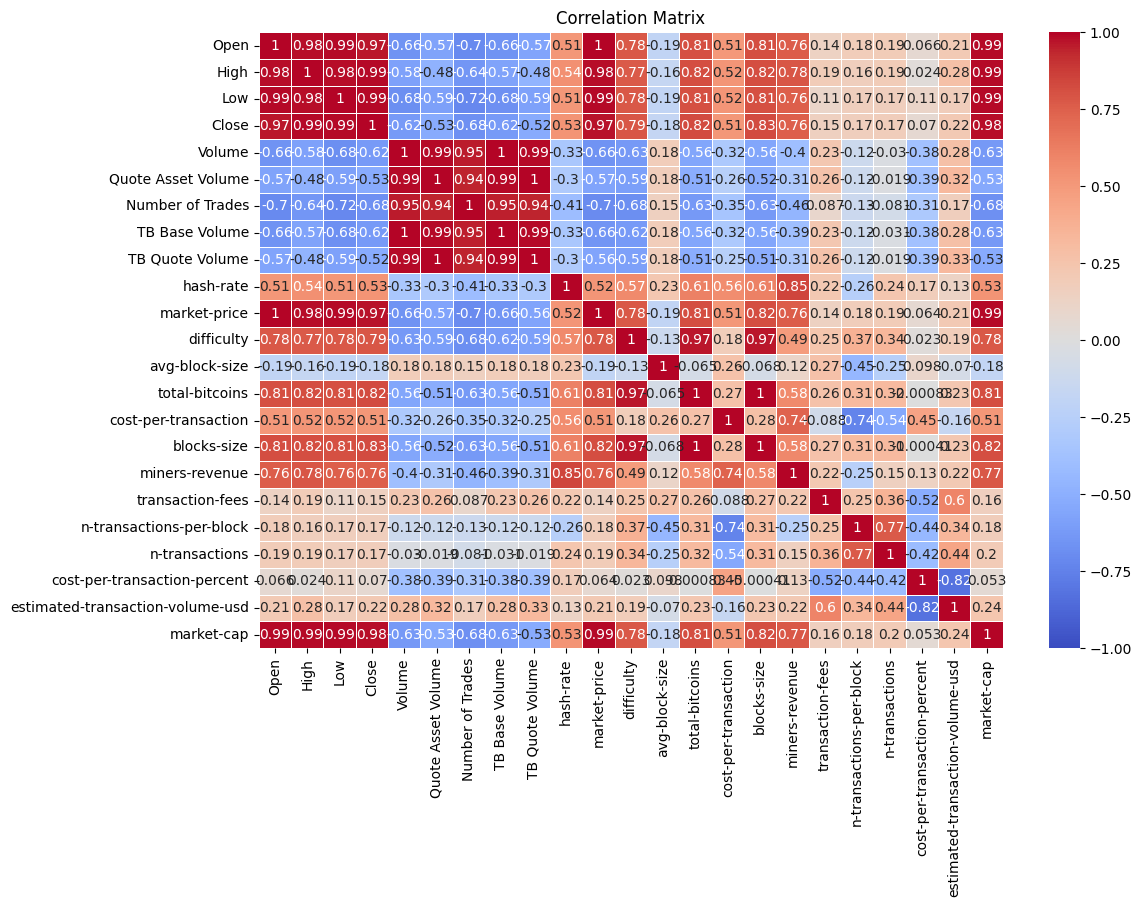

In [299]:
correlations = mergedData_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlations, annot=True, cmap="coolwarm", vmin=-1, vmax=1, linewidths=.5)
plt.title("Correlation Matrix")
plt.show()

In [300]:
correlations['market-price']

Open                                0.999897
High                                0.982417
Low                                 0.988935
Close                               0.969687
Volume                             -0.658614
Quote Asset Volume                 -0.565671
Number of Trades                   -0.699752
TB Base Volume                     -0.655970
TB Quote Volume                    -0.562822
hash-rate                           0.518519
market-price                        1.000000
difficulty                          0.777911
avg-block-size                     -0.188523
total-bitcoins                      0.812602
cost-per-transaction                0.509443
blocks-size                         0.815781
miners-revenue                      0.761399
transaction-fees                    0.143073
n-transactions-per-block            0.179022
n-transactions                      0.189208
cost-per-transaction-percent        0.064448
estimated-transaction-volume-usd    0.213394
market-cap

In [301]:
mergedData_df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Close Time',
       'Quote Asset Volume', 'Number of Trades', 'TB Base Volume',
       'TB Quote Volume', 'Ignore', 'hash-rate', 'market-price', 'difficulty',
       'avg-block-size', 'total-bitcoins', 'cost-per-transaction',
       'blocks-size', 'miners-revenue', 'transaction-fees',
       'n-transactions-per-block', 'n-transactions',
       'cost-per-transaction-percent', 'estimated-transaction-volume-usd',
       'market-cap'],
      dtype='object')

In [302]:
csv_file=mergedData_df.to_csv('data_with_blockchain_Modified.csv')
csv_file

# Technical Indicators 

In [333]:
#calculate the EMA
mergedData_df['EMA'] = mergedData_df['Close'].ewm(span=1).mean()
mergedData_df.head()

,Open,High,Low,Close,Volume,Close Time,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume,...,n-transactions,cost-per-transaction-percent,estimated-transaction-volume-usd,market-cap,EMA,MACD,RSI,MOM,PROC,%K
date,,,,,,,,,,,,,,,,,,,,,
2023-01-27,23009.65,23500.0,22534.88,23074.16,280833.86315,2023-01-27 23:59:59.999000064,6.461708e+09,7079096,139699.27638,3.214624e+09,...,303179.0,0.889710,2.520965e+09,4.456605e+11,23074.16,0.000000,NaN,NaN,NaN,NaN
2023-01-28,23074.16,23189.0,22878.46,23022.60,148115.71085,2023-01-28 23:59:59.999000064,3.408985e+09,4181816,73861.83566,1.700058e+09,...,268849.0,2.178426,1.122025e+09,4.454395e+11,23022.60,-1.156795,NaN,NaN,NaN,NaN
2023-01-28,23074.16,23189.0,22878.46,23022.60,148115.71085,2023-01-28 23:59:59.999000064,3.408985e+09,4181816,73861.83566,1.700058e+09,...,268849.0,2.178426,1.122025e+09,4.427319e+11,23022.60,-1.473986,NaN,NaN,NaN,NaN
2023-01-28,23074.16,23189.0,22878.46,23022.60,148115.71085,2023-01-28 23:59:59.999000064,3.408985e+09,4181816,73861.83566,1.700058e+09,...,268849.0,2.178426,1.122025e+09,4.454395e+11,23022.60,-1.582127,NaN,NaN,NaN,NaN
2023-01-28,23074.16,23189.0,22878.46,23022.60,148115.71085,2023-01-28 23:59:59.999000064,3.408985e+09,4181816,73861.83566,1.700058e+09,...,268849.0,2.178426,1.122025e+09,4.427319e+11,23022.60,-1.607582,NaN,NaN,NaN,NaN


In [334]:
#calculate the MACD
temp_df=pd.DataFrame()
temp_df['EMA_12'] = mergedData_df['Close'].ewm(span=12).mean()
temp_df['EMA_26'] = mergedData_df['Close'].ewm(span=26).mean()
mergedData_df['MACD'] = temp_df['EMA_12'] - temp_df['EMA_26']
mergedData_df

,Open,High,Low,Close,Volume,Close Time,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume,...,n-transactions,cost-per-transaction-percent,estimated-transaction-volume-usd,market-cap,EMA,MACD,RSI,MOM,PROC,%K
date,,,,,,,,,,,,,,,,,,,,,
2023-01-27,23009.65,23500.00,22534.88,23074.16,280833.86315,2023-01-27 23:59:59.999000064,6.461708e+09,7079096,139699.27638,3.214624e+09,...,303179.0,0.889710,2.520965e+09,4.456605e+11,23074.16,0.000000,NaN,NaN,NaN,NaN
2023-01-28,23074.16,23189.00,22878.46,23022.60,148115.71085,2023-01-28 23:59:59.999000064,3.408985e+09,4181816,73861.83566,1.700058e+09,...,268849.0,2.178426,1.122025e+09,4.454395e+11,23022.60,-1.156795,NaN,NaN,NaN,NaN
2023-01-28,23074.16,23189.00,22878.46,23022.60,148115.71085,2023-01-28 23:59:59.999000064,3.408985e+09,4181816,73861.83566,1.700058e+09,...,268849.0,2.178426,1.122025e+09,4.427319e+11,23022.60,-1.473986,NaN,NaN,NaN,NaN
2023-01-28,23074.16,23189.00,22878.46,23022.60,148115.71085,2023-01-28 23:59:59.999000064,3.408985e+09,4181816,73861.83566,1.700058e+09,...,268849.0,2.178426,1.122025e+09,4.454395e+11,23022.60,-1.582127,NaN,NaN,NaN,NaN
2023-01-28,23074.16,23189.00,22878.46,23022.60,148115.71085,2023-01-28 23:59:59.999000064,3.408985e+09,4181816,73861.83566,1.700058e+09,...,268849.0,2.178426,1.122025e+09,4.427319e+11,23022.60,-1.607582,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-25,27510.93,28399.99,27192.00,28300.79,52325.14637,2023-04-25 23:59:59.999000064,1.446329e+09,1087067,26833.47192,7.420692e+08,...,369843.0,0.859660,2.588479e+09,5.301930e+11,28300.79,-352.566983,81.457034,483.94,3.807197,93.192284
2023-04-25,27510.93,28399.99,27192.00,28300.79,52325.14637,2023-04-25 23:59:59.999000064,1.446329e+09,1087067,26833.47192,7.420692e+08,...,369843.0,0.859660,2.588479e+09,5.408705e+11,28300.79,-282.561994,81.457034,483.94,3.807197,93.192284
2023-04-25,27510.93,28399.99,27192.00,28300.79,52325.14637,2023-04-25 23:59:59.999000064,1.446329e+09,1087067,26833.47192,7.420692e+08,...,369843.0,0.859660,2.588479e+09,5.301930e+11,28300.79,-224.494701,72.081987,710.19,1.739737,93.192284


In [344]:
#Calculate the RSI
price_changes = mergedData_df['Close'].diff()
positive_changes = price_changes.where(price_changes > 0, 0)
negative_changes = -price_changes.where(price_changes < 0, 0)
temp_df['avg_positive_changes'] = positive_changes.rolling(window=14).mean()
temp_df['avg_negative_changes'] = negative_changes.rolling(window=14).mean()
temp_df['RS'] = temp_df['avg_positive_changes'] / temp_df['avg_negative_changes']#NaN 
mergedData_df['RSI'] = 100 - (100 / (1 + temp_df['RS']))
mergedData_df.info() #null values 

<class 'pandas.core.frame.DataFrame'>
Index: 396 entries, 2023-01-27 to 2023-04-26
Data columns (total 31 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Open                              396 non-null    float64       
 1   High                              396 non-null    float64       
 2   Low                               396 non-null    float64       
 3   Close                             396 non-null    float64       
 4   Volume                            396 non-null    float64       
 5   Close Time                        396 non-null    datetime64[ns]
 6   Quote Asset Volume                396 non-null    float64       
 7   Number of Trades                  396 non-null    int64         
 8   TB Base Volume                    396 non-null    float64       
 9   TB Quote Volume                   396 non-null    float64       
 10  Ignore                            396 n

In [336]:
price_changes.where(price_changes>0,0).rolling(window=14).mean()

date
2023-01-27          NaN
2023-01-28          NaN
2023-01-28          NaN
2023-01-28          NaN
2023-01-28          NaN
                ...    
2023-04-25    95.990714
2023-04-25    95.990714
2023-04-25    56.418571
2023-04-25    56.418571
2023-04-26    64.597143
Name: Close, Length: 396, dtype: float64

In [337]:
N = 10  # You can set the desired N value for the momentum calculation
mergedData_df['MOM'] = mergedData_df['Close'] - mergedData_df['Close'].shift(N)
mergedData_df.info() #new null values 

<class 'pandas.core.frame.DataFrame'>
Index: 396 entries, 2023-01-27 to 2023-04-26
Data columns (total 31 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Open                              396 non-null    float64       
 1   High                              396 non-null    float64       
 2   Low                               396 non-null    float64       
 3   Close                             396 non-null    float64       
 4   Volume                            396 non-null    float64       
 5   Close Time                        396 non-null    datetime64[ns]
 6   Quote Asset Volume                396 non-null    float64       
 7   Number of Trades                  396 non-null    int64         
 8   TB Base Volume                    396 non-null    float64       
 9   TB Quote Volume                   396 non-null    float64       
 10  Ignore                            396 n

In [338]:
# null_indices = mergedData_df[mergedData_df.isnull().any(axis=1)].reset_index()["index"].tolist()
# null_indices #13 rows, rolling window is of size 14 

In [339]:
N = 14  # You can set the desired N value for the PROC calculation
mergedData_df['PROC'] = (mergedData_df['Close'] - mergedData_df['Close'].shift(N)) / mergedData_df['Close'].shift(N) * 100
mergedData_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 396 entries, 2023-01-27 to 2023-04-26
Data columns (total 31 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Open                              396 non-null    float64       
 1   High                              396 non-null    float64       
 2   Low                               396 non-null    float64       
 3   Close                             396 non-null    float64       
 4   Volume                            396 non-null    float64       
 5   Close Time                        396 non-null    datetime64[ns]
 6   Quote Asset Volume                396 non-null    float64       
 7   Number of Trades                  396 non-null    int64         
 8   TB Base Volume                    396 non-null    float64       
 9   TB Quote Volume                   396 non-null    float64       
 10  Ignore                            396 n

In [340]:
N = 14  # You can set the desired N value for the %K calculation
low_N = mergedData_df['Low'].rolling(window=N).min()
high_N = mergedData_df['High'].rolling(window=N).max()
mergedData_df['%K'] = (mergedData_df['Close'] - low_N) / (high_N - low_N) * 100
mergedData_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 396 entries, 2023-01-27 to 2023-04-26
Data columns (total 31 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Open                              396 non-null    float64       
 1   High                              396 non-null    float64       
 2   Low                               396 non-null    float64       
 3   Close                             396 non-null    float64       
 4   Volume                            396 non-null    float64       
 5   Close Time                        396 non-null    datetime64[ns]
 6   Quote Asset Volume                396 non-null    float64       
 7   Number of Trades                  396 non-null    int64         
 8   TB Base Volume                    396 non-null    float64       
 9   TB Quote Volume                   396 non-null    float64       
 10  Ignore                            396 n

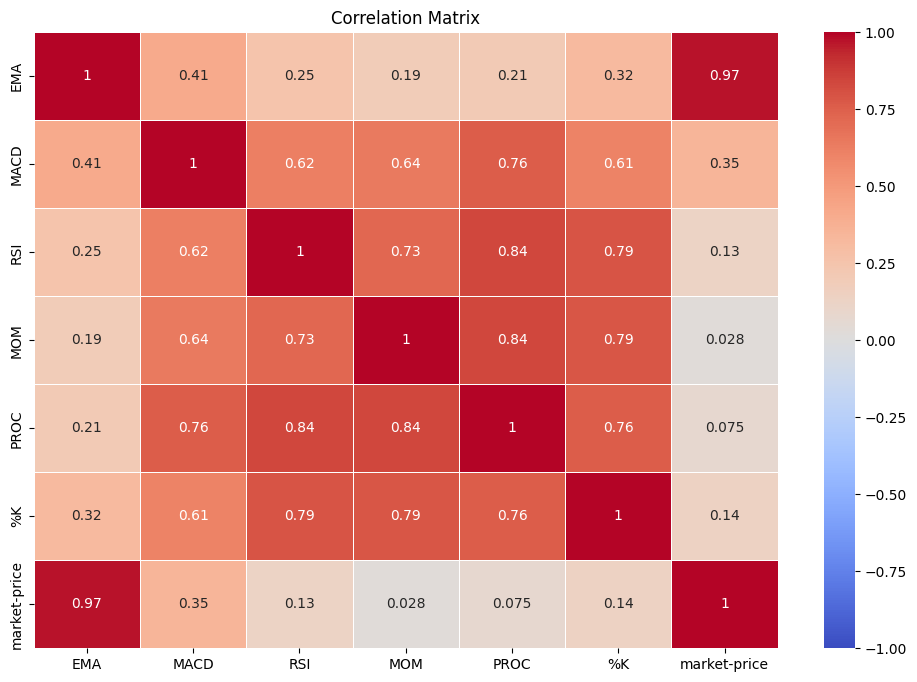

In [345]:
sub_df=mergedData_df[['EMA','MACD','RSI','MOM','PROC','%K','market-price']]
correlations = sub_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlations, annot=True, cmap="coolwarm", vmin=-1, vmax=1, linewidths=.5)
plt.title("Correlation Matrix")
plt.show()

In [329]:
csv_file=mergedData_df.to_csv('data_with_tecInd.csv')
csv_file

In [ ]:
mergedData_df.dropna(inplace=True)

In [ ]:
csv_file=mergedData_df.to_csv('data_with_tecInd.csv')
csv_file

In [ ]:
mergedData_df